In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

import joblib


#Load Dataset
df = pd.read_csv('../dota2_2k_dataset/ml_ready_data.csv')




In [3]:
# Convert radiant_win from True/False to 1/0
df["radiant_win"] = df["radiant_win"].astype(int)

# List of hero pick columns
hero_columns = ['radiant_hero_1', 'radiant_hero_2', 'radiant_hero_3', 'radiant_hero_4', 'radiant_hero_5',
                'dire_hero_1', 'dire_hero_2', 'dire_hero_3', 'dire_hero_4', 'dire_hero_5']

# One-hot encoding
one_hot_df = pd.DataFrame()
for col in hero_columns:
    one_hot = pd.get_dummies(df[col], prefix='hero')
    one_hot_df = one_hot_df.add(one_hot, fill_value=0)

# Combine one-hot encoded features with the target variable
df_encoded = pd.concat([one_hot_df, df['radiant_win']], axis=1)

# Drop match_id if present
if 'match_id' in df_encoded.columns:
    df_encoded = df_encoded.drop("match_id", axis=1)

# Define features and target
X = df_encoded.drop("radiant_win", axis=1)
y = df_encoded["radiant_win"]

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

# Predictions and Evaluation
from sklearn.metrics import accuracy_score, classification_report
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5229
              precision    recall  f1-score   support

           0       0.47      0.30      0.37      4581
           1       0.55      0.71      0.62      5419

    accuracy                           0.52     10000
   macro avg       0.51      0.51      0.49     10000
weighted avg       0.51      0.52      0.50     10000



Accuracy: 0.5229
              precision    recall  f1-score   support

           0       0.47      0.30      0.37      4581
           1       0.55      0.71      0.62      5419

    accuracy                           0.52     10000
   macro avg       0.51      0.51      0.49     10000
weighted avg       0.51      0.52      0.50     10000



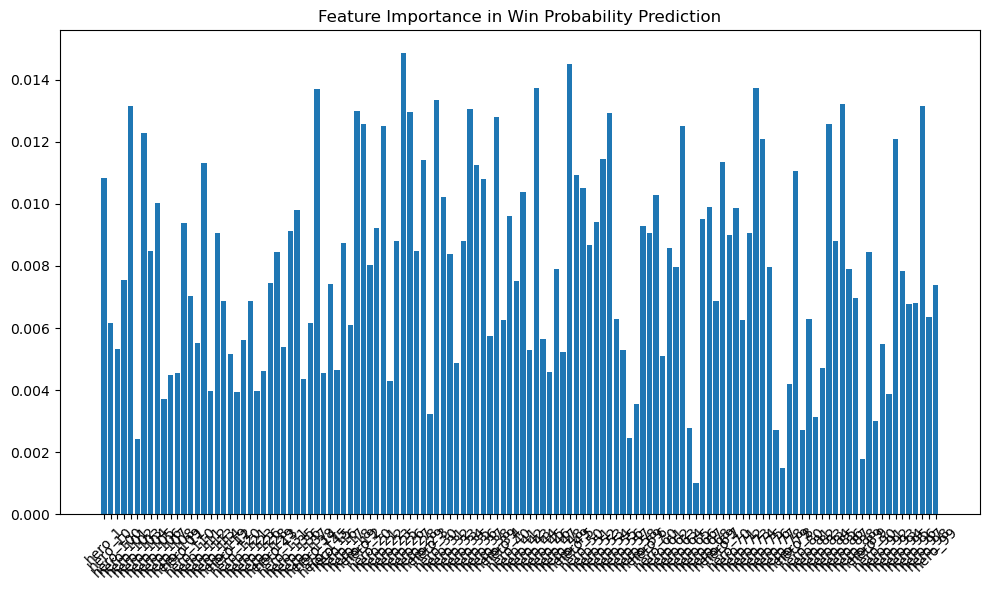

In [5]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance plot
importances = rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances)
plt.title("Feature Importance in Win Probability Prediction")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
import json
# Save model
joblib.dump(rf, 'win_probability_model.pkl')
print(type(rf))

# Save the feature columns used during training
with open("hero_feature_columns.json", "w") as f:
    json.dump(X.columns.tolist(), f)


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
